# hw2: Решающие деревья

*Спасибо великому курсу великого Евгения Соколова*

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплементацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

Все данные, на которых будут обучаться модели, вы можете найти на диске.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Неэффективная и/или неоригинальная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Заполненный ноутбук ```hw2-trees.ipynb``` и модуль с реализованными функциями и классами ```hw2code.py``` необходимо загрузить на свой Github. Затем нужно оставить комментарий в Google-таблице с оценками в столбце <<hw2>> в строке со своей фамилией о том, что вы выполнили работу с указанием ника на Kaggle.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [3]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0 )
]

In [4]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

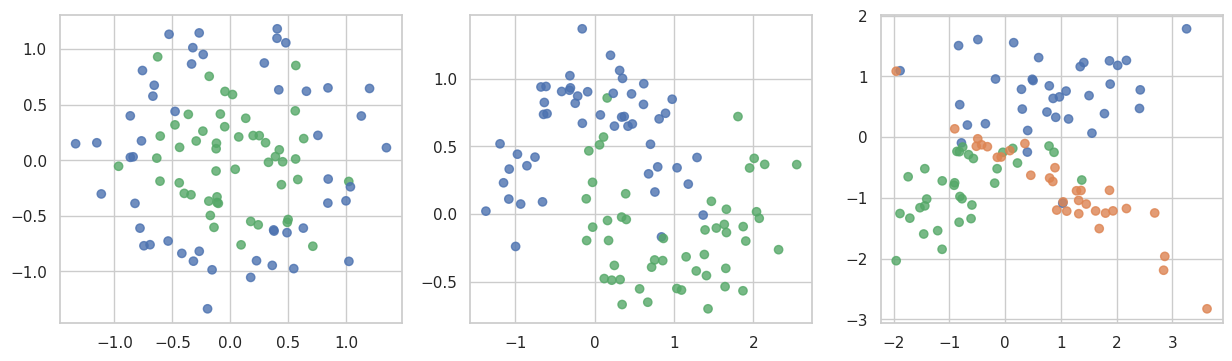

In [5]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [6]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

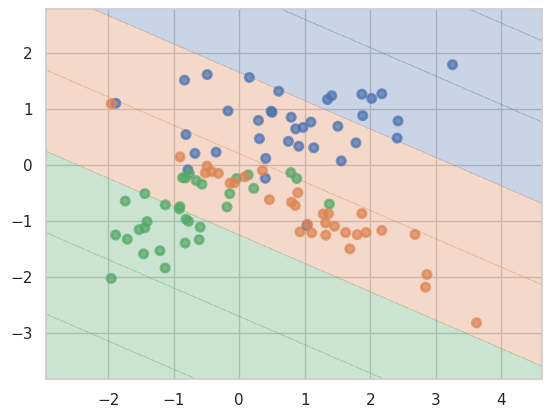

In [7]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)


Датасет 1
Accuracy на обучающей выборке: 1.000
Accuracy на тестовой выборке: 0.733


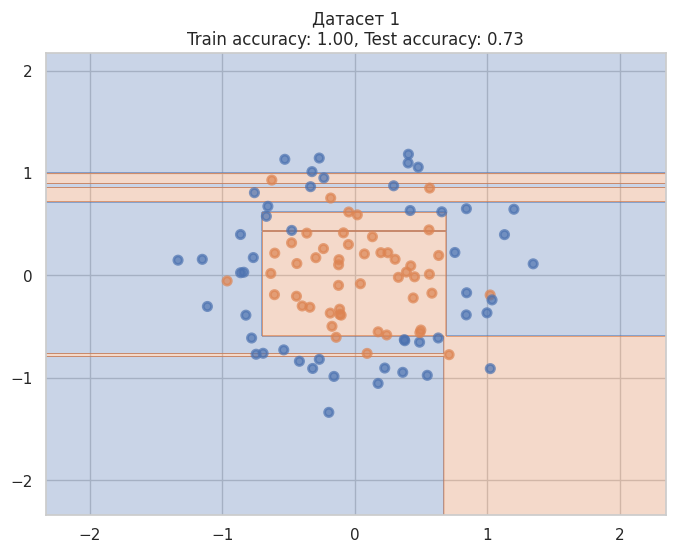

Сильное переобучение!

Датасет 2
Accuracy на обучающей выборке: 1.000
Accuracy на тестовой выборке: 0.867


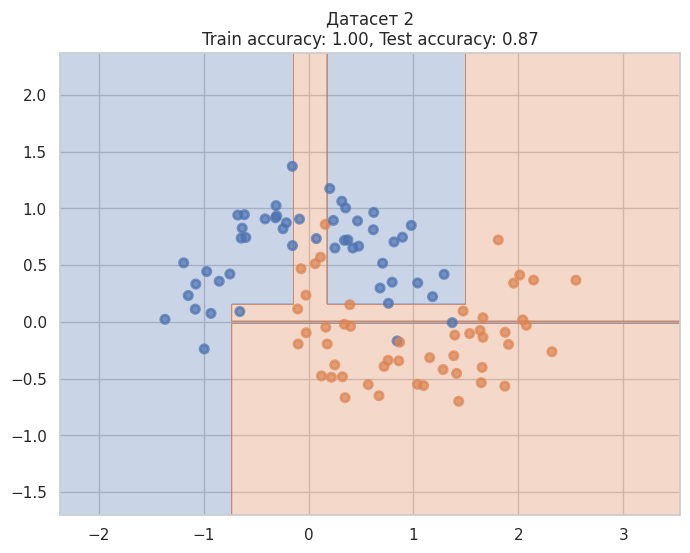

Умеренное переобучение

Датасет 3
Accuracy на обучающей выборке: 1.000
Accuracy на тестовой выборке: 0.833


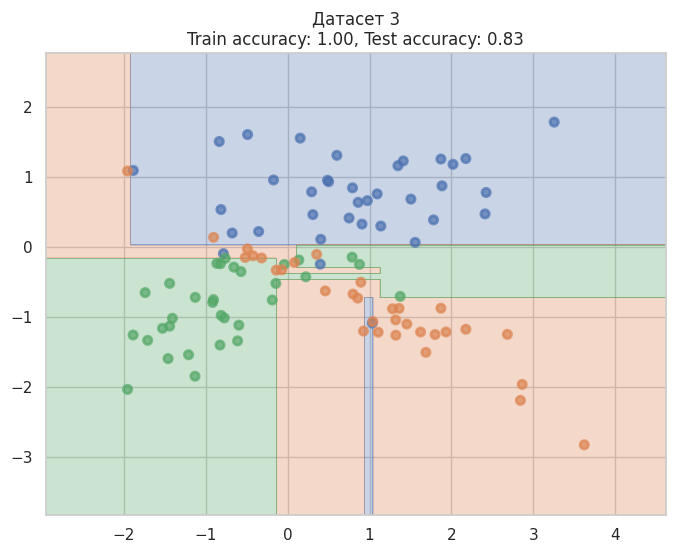

Умеренное переобучение


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import seaborn as sns

def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

for i, (X, y) in enumerate(datasets):
    print(f"\nДатасет {i+1}")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, tree.predict(X_train))
    test_acc = accuracy_score(y_test, tree.predict(X_test))

    print(f"Accuracy на обучающей выборке: {train_acc:.3f}")
    print(f"Accuracy на тестовой выборке: {test_acc:.3f}")

    plt.figure(figsize=(8, 6))
    plot_surface(tree, X, y)
    plt.title(f"Датасет {i+1}\nTrain accuracy: {train_acc:.2f}, Test accuracy: {test_acc:.2f}")
    plt.show()

    if train_acc - test_acc > 0.2:
        print("Сильное переобучение!")
    elif train_acc - test_acc > 0.1:
        print("Умеренное переобучение")
    else:
        print("Переобучение минимальное или отсутствует")

__Ответ:__

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?


Анализ датасета 1

Параметры: max_depth=2, min_samples_leaf=1
Train accuracy: 0.829  Test accuracy: 0.633
Переобучение: Умеренное


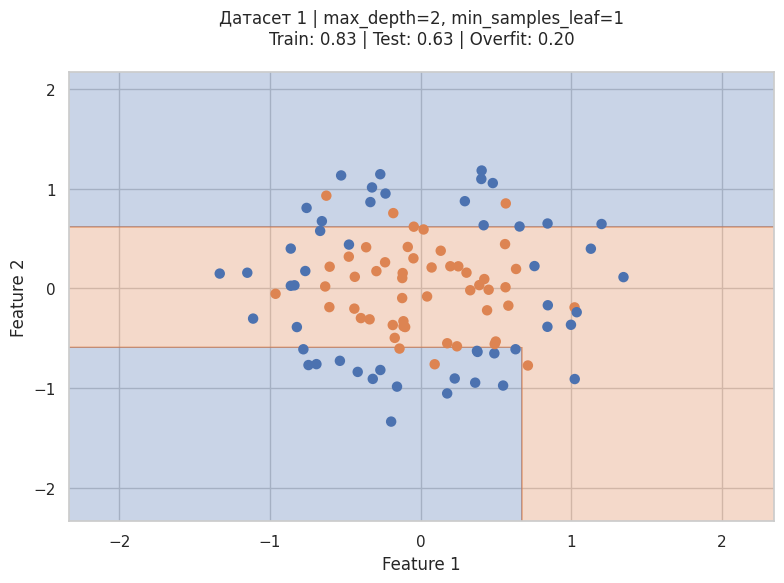


Параметры: max_depth=2, min_samples_leaf=5
Train accuracy: 0.814  Test accuracy: 0.667
Переобучение: Умеренное


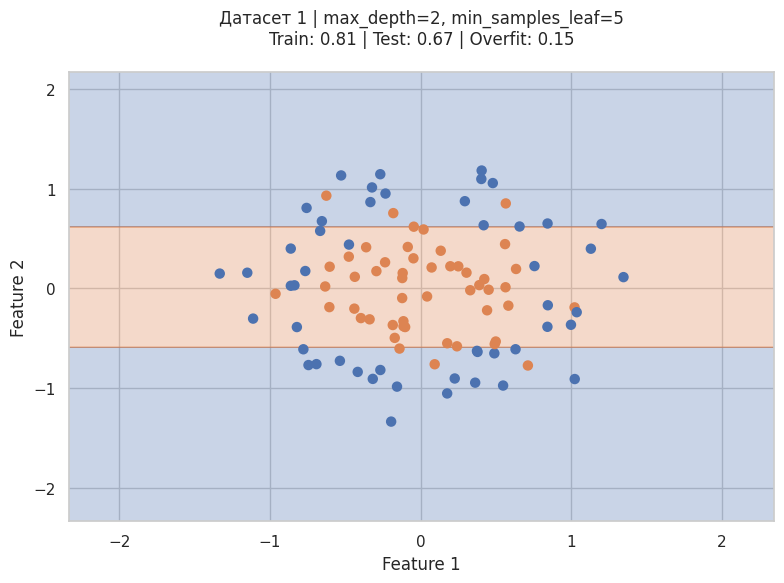


Параметры: max_depth=2, min_samples_leaf=20
Train accuracy: 0.686  Test accuracy: 0.733
Переобучение: Минимальное


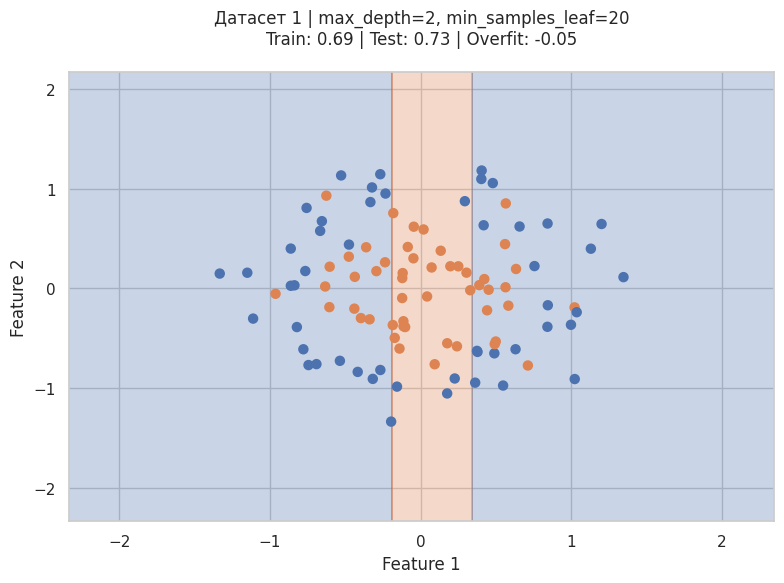


Параметры: max_depth=5, min_samples_leaf=1
Train accuracy: 0.971  Test accuracy: 0.767
Переобучение: Сильное


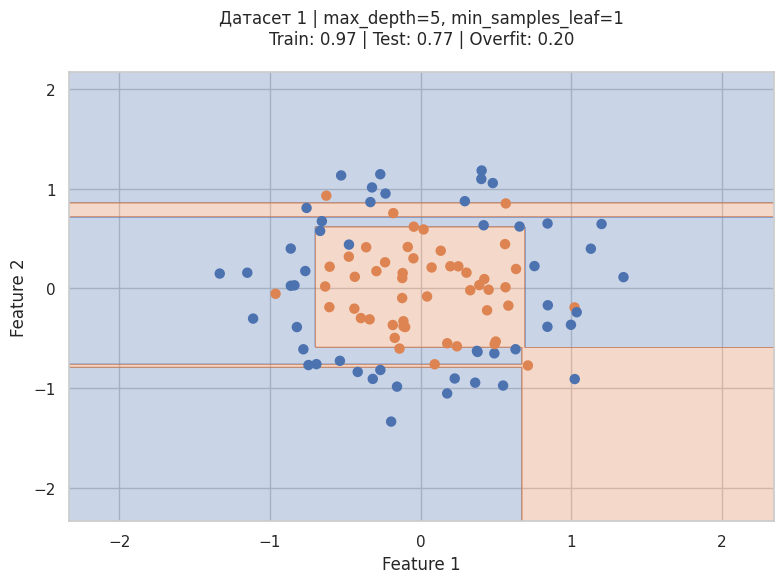


Параметры: max_depth=5, min_samples_leaf=5
Train accuracy: 0.871  Test accuracy: 0.900
Переобучение: Минимальное


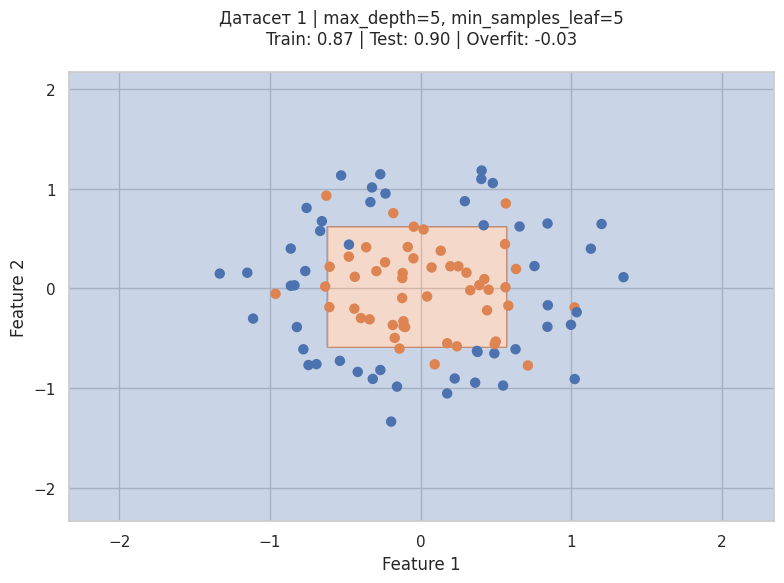


Параметры: max_depth=5, min_samples_leaf=20
Train accuracy: 0.686  Test accuracy: 0.733
Переобучение: Минимальное


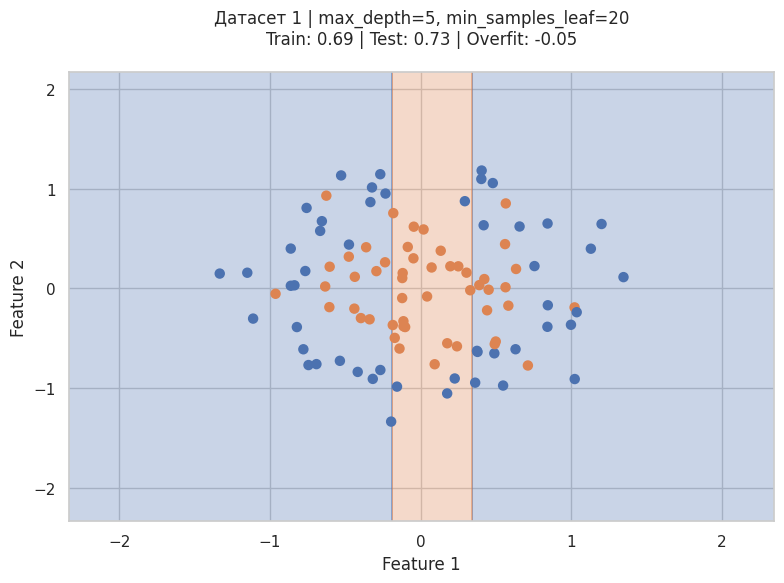


Параметры: max_depth=None, min_samples_leaf=1
Train accuracy: 1.000  Test accuracy: 0.733
Переобучение: Сильное


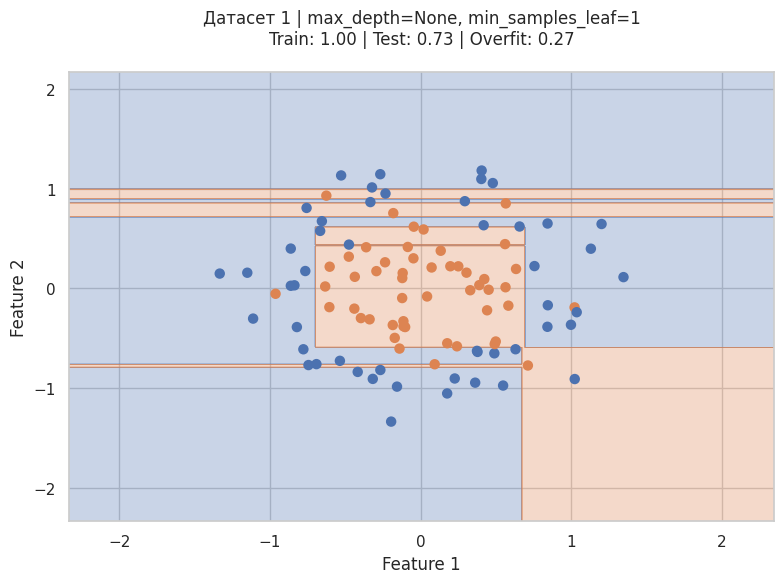


Параметры: max_depth=None, min_samples_leaf=5
Train accuracy: 0.871  Test accuracy: 0.900
Переобучение: Минимальное


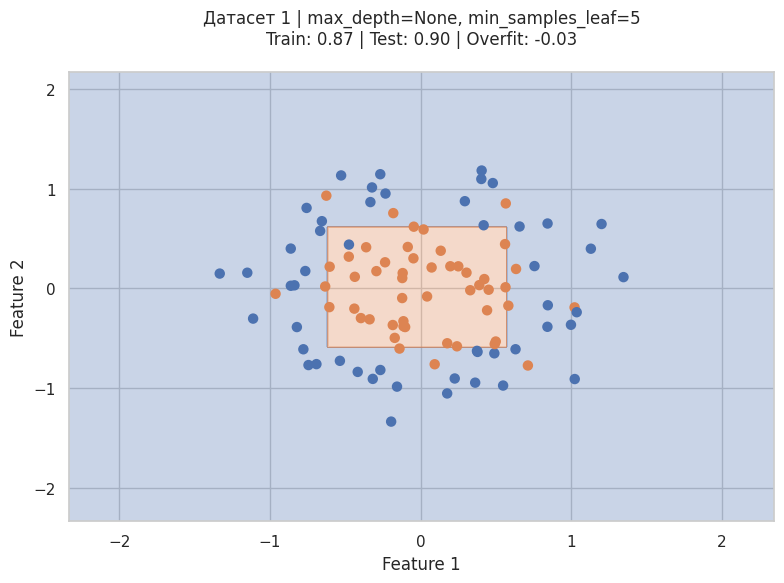


Параметры: max_depth=None, min_samples_leaf=20
Train accuracy: 0.686  Test accuracy: 0.733
Переобучение: Минимальное


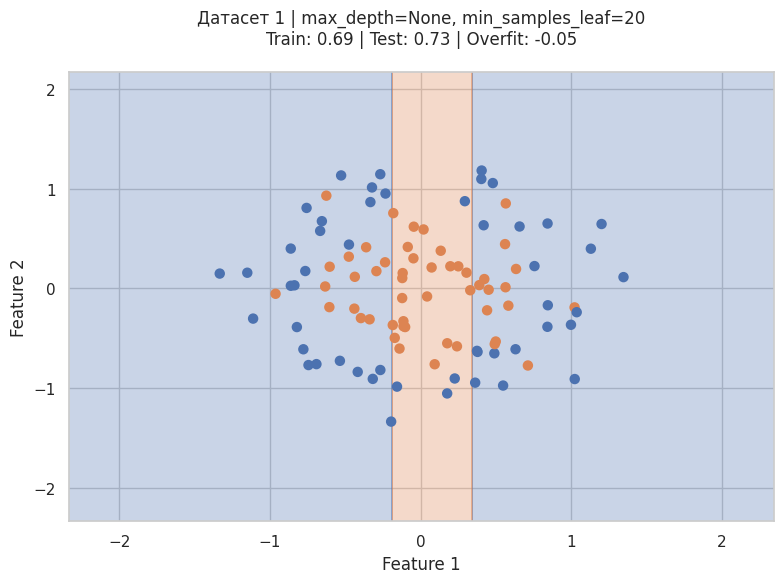


Анализ датасета 2

Параметры: max_depth=2, min_samples_leaf=1
Train accuracy: 0.914  Test accuracy: 0.933
Переобучение: Минимальное


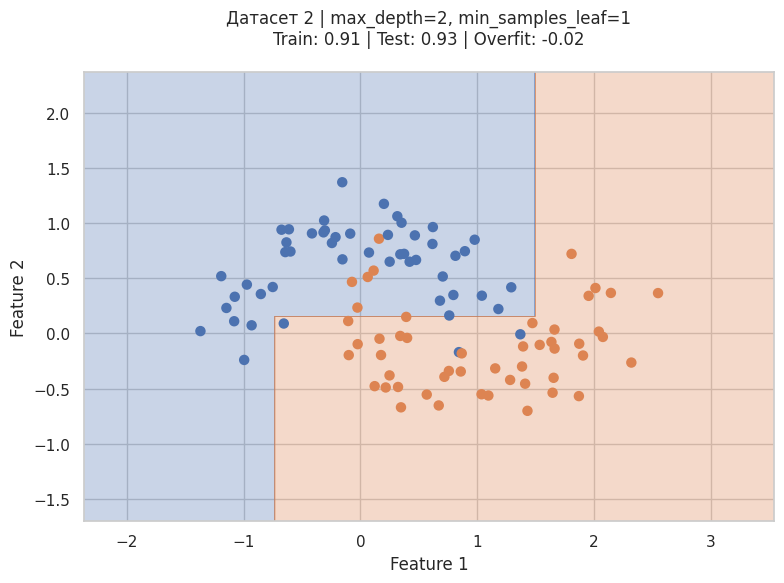


Параметры: max_depth=2, min_samples_leaf=5
Train accuracy: 0.886  Test accuracy: 0.800
Переобучение: Минимальное


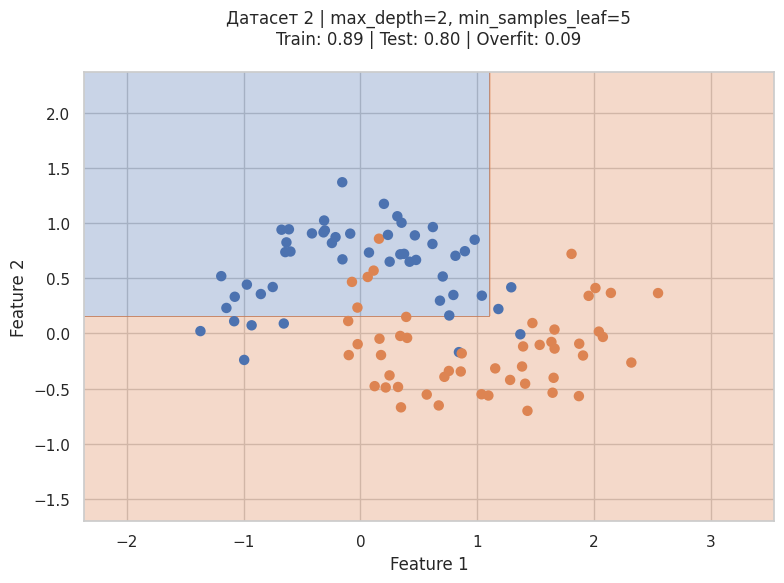


Параметры: max_depth=2, min_samples_leaf=20
Train accuracy: 0.843  Test accuracy: 0.800
Переобучение: Минимальное


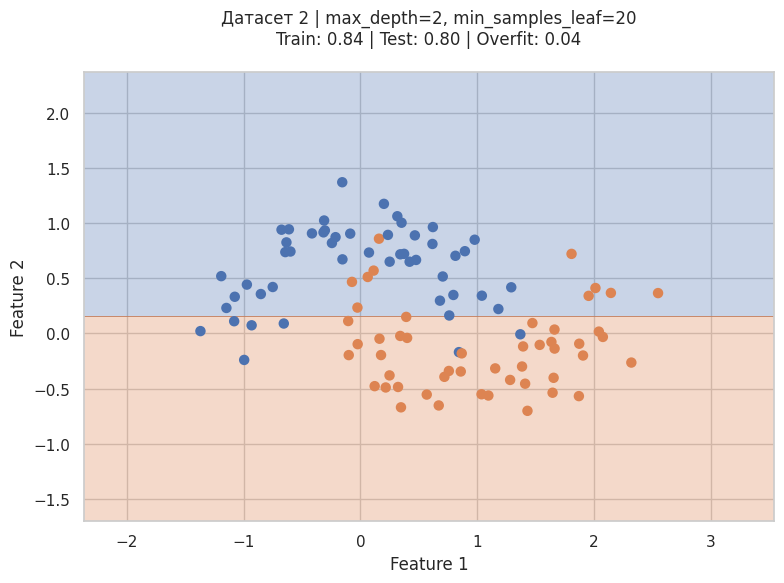


Параметры: max_depth=5, min_samples_leaf=1
Train accuracy: 1.000  Test accuracy: 0.867
Переобучение: Умеренное


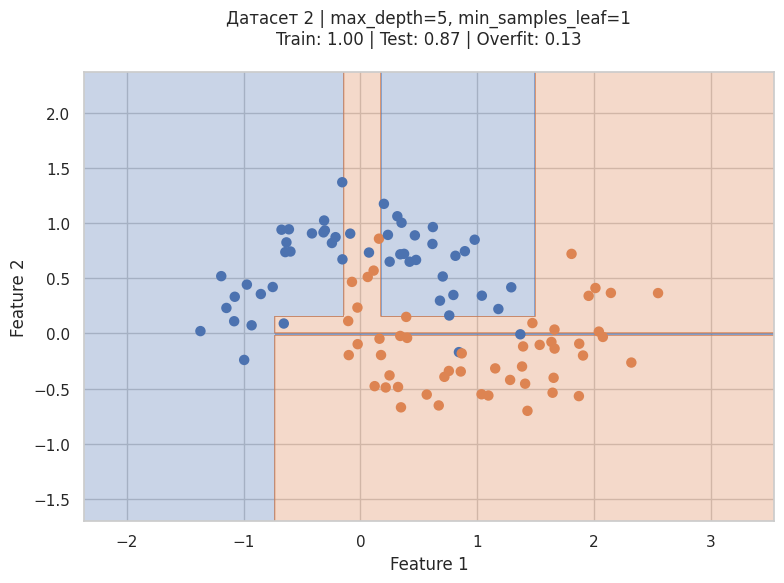


Параметры: max_depth=5, min_samples_leaf=5
Train accuracy: 0.957  Test accuracy: 0.733
Переобучение: Сильное


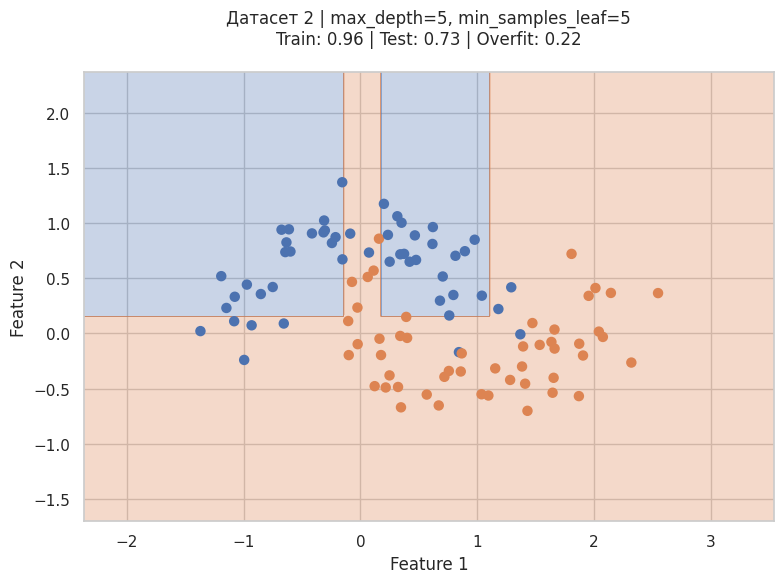


Параметры: max_depth=5, min_samples_leaf=20
Train accuracy: 0.843  Test accuracy: 0.800
Переобучение: Минимальное


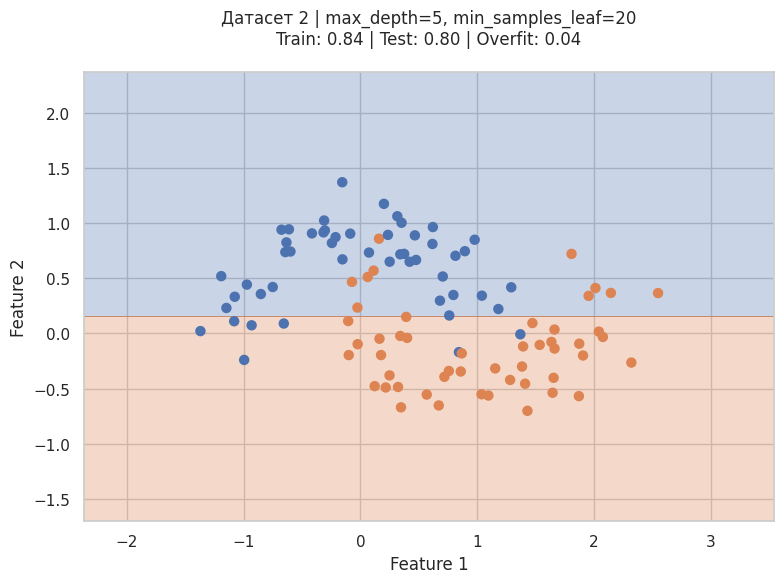


Параметры: max_depth=None, min_samples_leaf=1
Train accuracy: 1.000  Test accuracy: 0.867
Переобучение: Умеренное


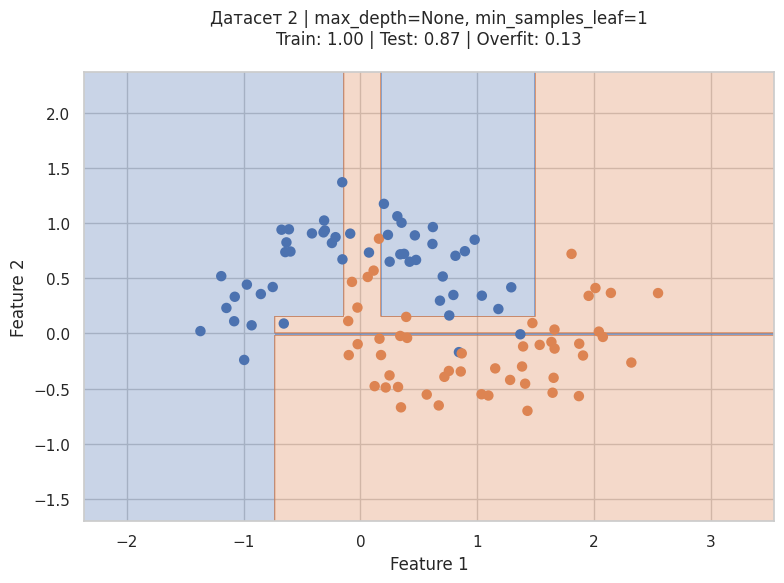


Параметры: max_depth=None, min_samples_leaf=5
Train accuracy: 0.957  Test accuracy: 0.733
Переобучение: Сильное


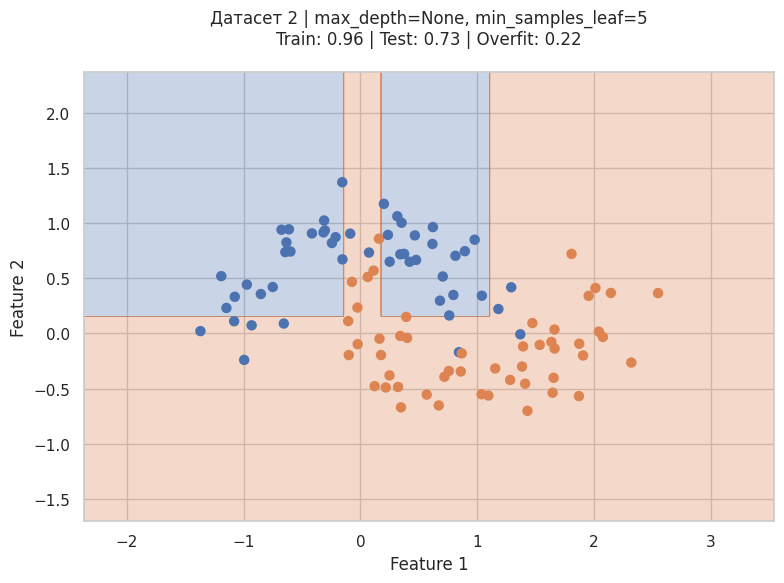


Параметры: max_depth=None, min_samples_leaf=20
Train accuracy: 0.843  Test accuracy: 0.800
Переобучение: Минимальное


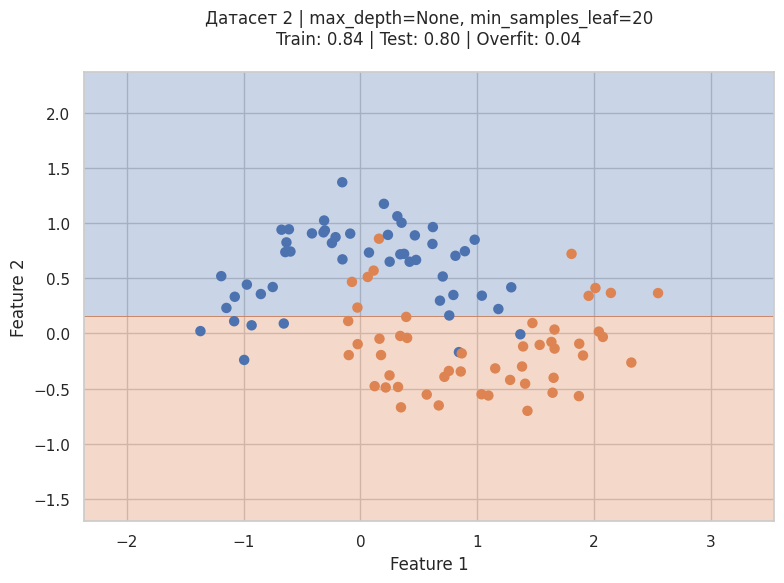


Анализ датасета 3

Параметры: max_depth=2, min_samples_leaf=1
Train accuracy: 0.900  Test accuracy: 0.767
Переобучение: Умеренное


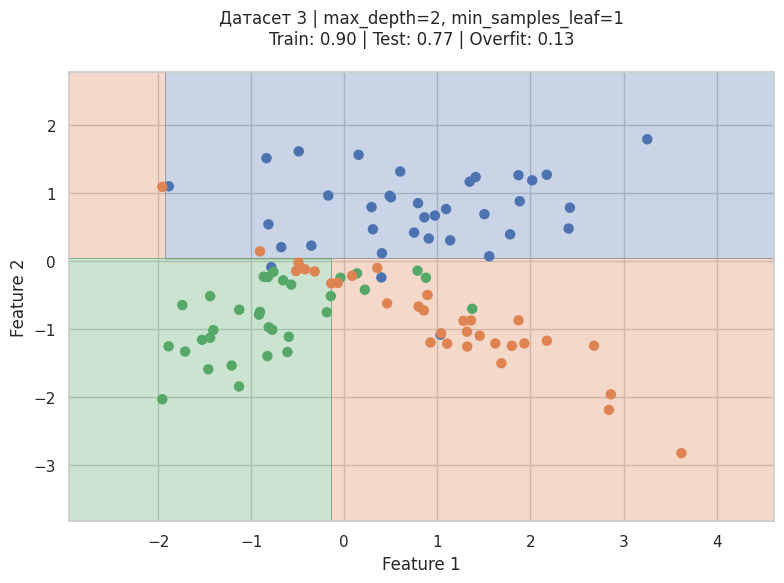


Параметры: max_depth=2, min_samples_leaf=5
Train accuracy: 0.886  Test accuracy: 0.767
Переобучение: Умеренное


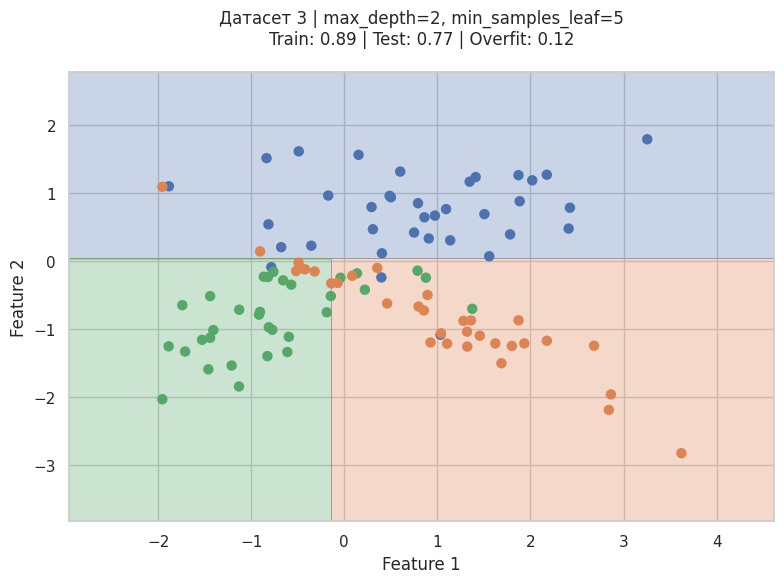


Параметры: max_depth=2, min_samples_leaf=20
Train accuracy: 0.886  Test accuracy: 0.767
Переобучение: Умеренное


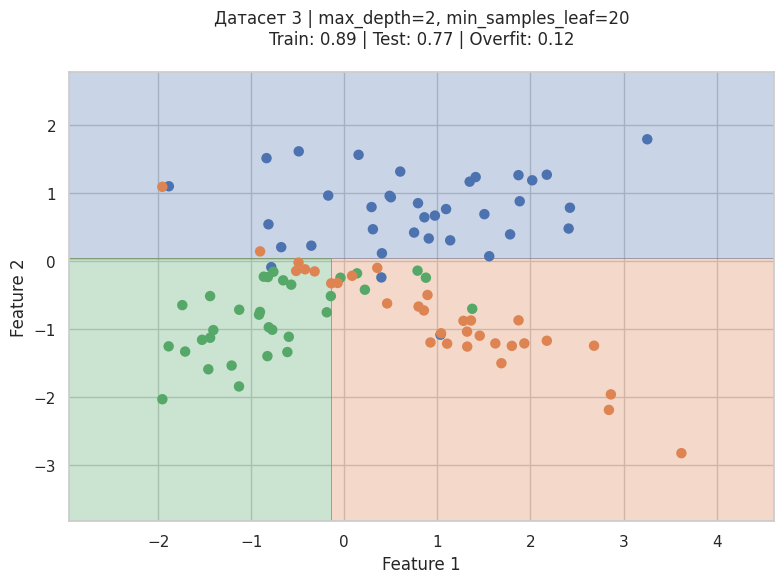


Параметры: max_depth=5, min_samples_leaf=1
Train accuracy: 0.971  Test accuracy: 0.800
Переобучение: Умеренное


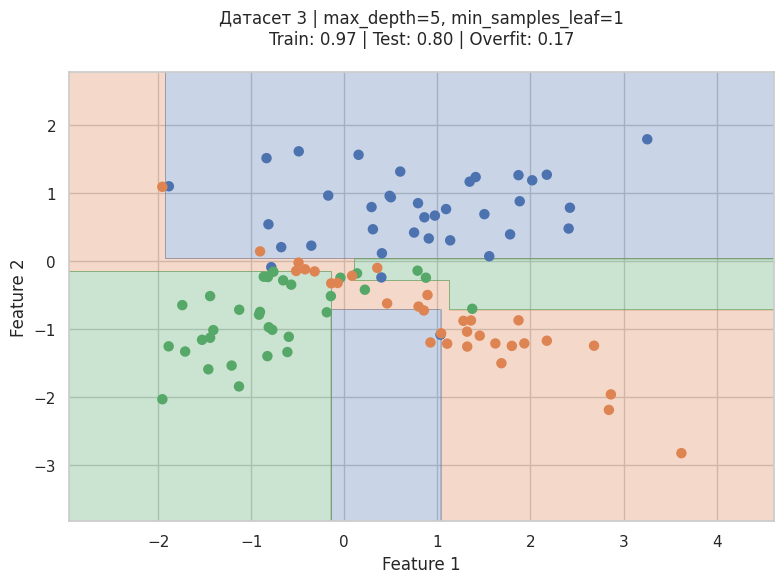


Параметры: max_depth=5, min_samples_leaf=5
Train accuracy: 0.900  Test accuracy: 0.700
Переобучение: Сильное


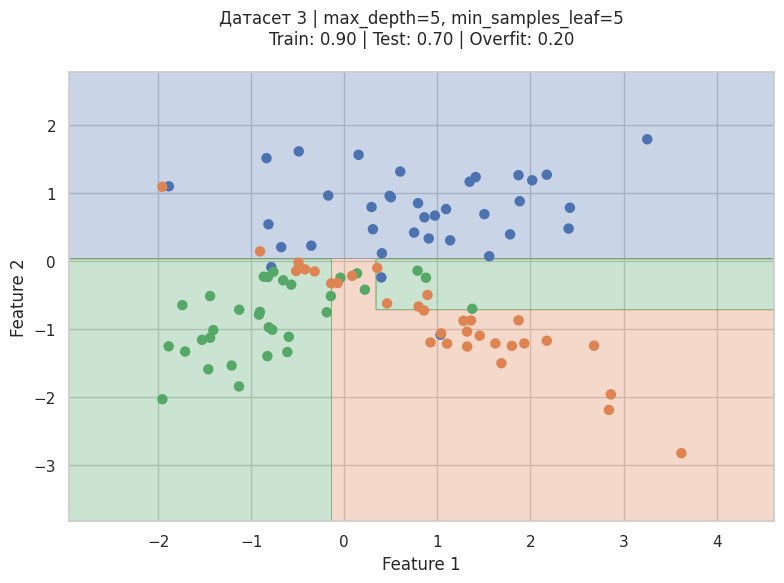


Параметры: max_depth=5, min_samples_leaf=20
Train accuracy: 0.886  Test accuracy: 0.767
Переобучение: Умеренное


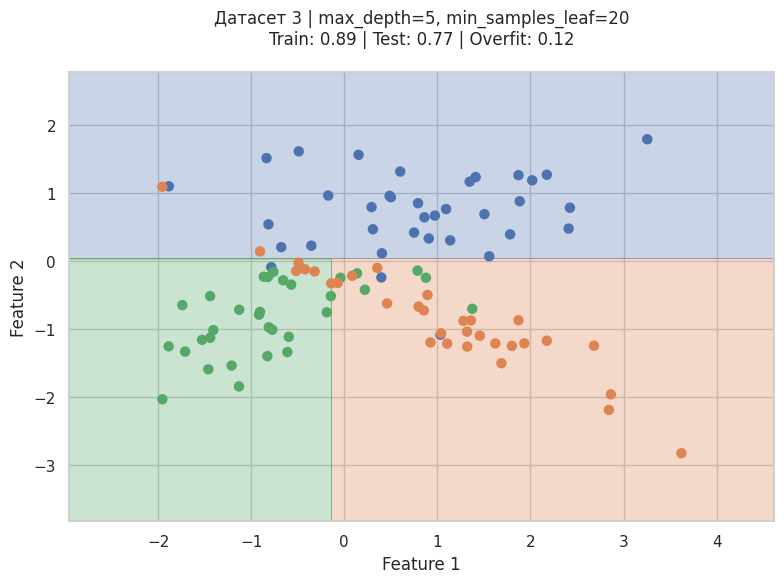


Параметры: max_depth=None, min_samples_leaf=1
Train accuracy: 1.000  Test accuracy: 0.833
Переобучение: Умеренное


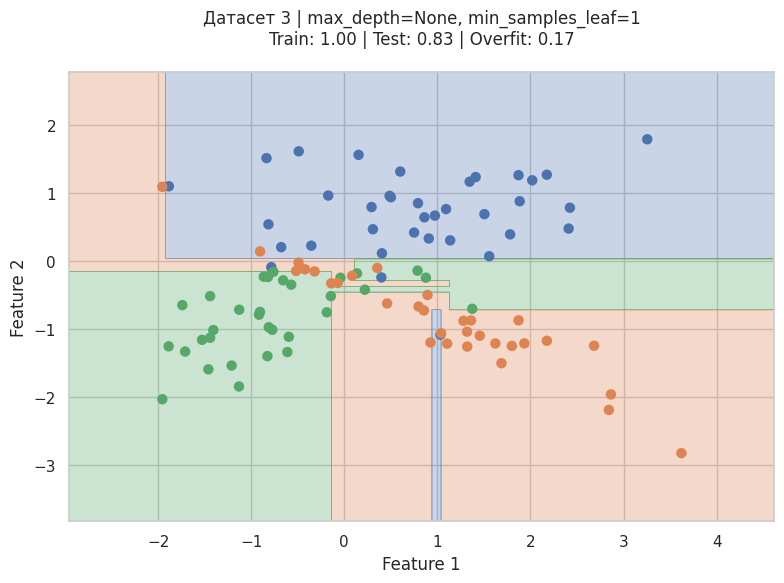


Параметры: max_depth=None, min_samples_leaf=5
Train accuracy: 0.900  Test accuracy: 0.700
Переобучение: Сильное


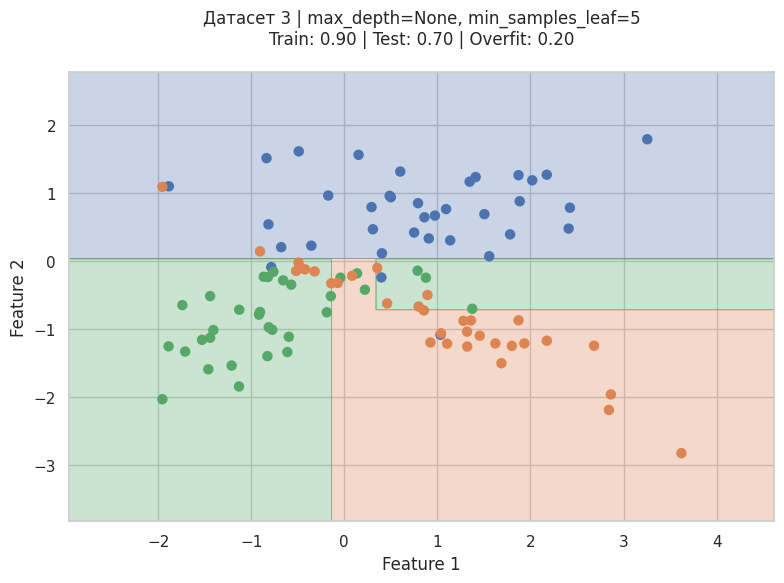


Параметры: max_depth=None, min_samples_leaf=20
Train accuracy: 0.886  Test accuracy: 0.767
Переобучение: Умеренное


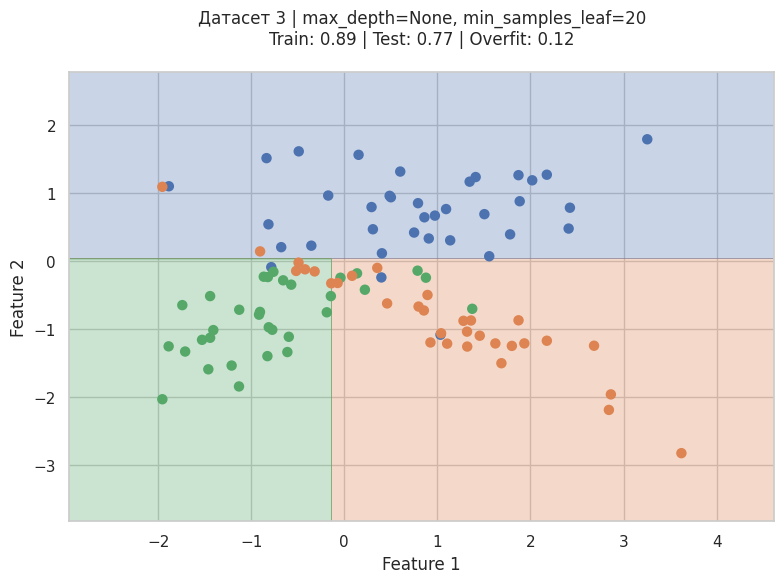

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import seaborn as sns

def plot_surface(clf, X, y, title=""):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    plt.figure(figsize=(8, 6))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap,
                edgecolors=np.array(palette)[y], linewidths=1.5)
    plt.title(title, pad=20)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.tight_layout()

param_grid = {
    'max_depth': [2, 5, None],
    'min_samples_leaf': [1, 5, 20]
}

RANDOM_STATE = 42

for dataset_idx, (X, y) in enumerate(datasets, 1):
    print(f"\n{'='*50}\nАнализ датасета {dataset_idx}\n{'='*50}")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=RANDOM_STATE)

    for max_depth in param_grid['max_depth']:
        for min_samples_leaf in param_grid['min_samples_leaf']:

            tree = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_leaf=min_samples_leaf,
                random_state=RANDOM_STATE
            )
            tree.fit(X_train, y_train)


            train_acc = accuracy_score(y_train, tree.predict(X_train))
            test_acc = accuracy_score(y_test, tree.predict(X_test))
            overfitting = train_acc - test_acc


            print(f"\nПараметры: max_depth={max_depth}, min_samples_leaf={min_samples_leaf}")
            print(f"Train accuracy: {train_acc:.3f}  Test accuracy: {test_acc:.3f}")
            print(f"Переобучение: {'Сильное' if overfitting > 0.2 else 'Умеренное' if overfitting > 0.1 else 'Минимальное'}")

            plot_surface(
                tree, X, y,
                title=f"Датасет {dataset_idx} | max_depth={max_depth}, min_samples_leaf={min_samples_leaf}\n"
                      f"Train: {train_acc:.2f} | Test: {test_acc:.2f} | Overfit: {overfitting:.2f}"
            )
            plt.show()

__Ответ:__ Изменение разделяющей поверхности и обобщающей способности отличается в зависимости от датасета.

Dataset 1: Сильное переобучение при увеличении max_depth (разница между train и test accuracy до 0.2). Снижение глубины (max_depth=2) и увеличение min_samples_leaf=5 уменьшает переобучение, но test accuracy остаётся низкой.

Dataset 2: Даже при max_depth=5 модель хорошо обобщается. При min_samples_leaf=10 качество на тесте падает, но разница между train и test сокращается.

Dataset 3: Переобучение при увеличении глубины менее выражено, чем в Dataset 1. Установка min_samples_leaf=10 повышает устойчивость модели, но снижает accuracy.

Таким образом, оптимальные значения гиперпараметров зависят от структуры данных: для одних датасетов лучше строгая регуляризация, для других — более гибкая настройка.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

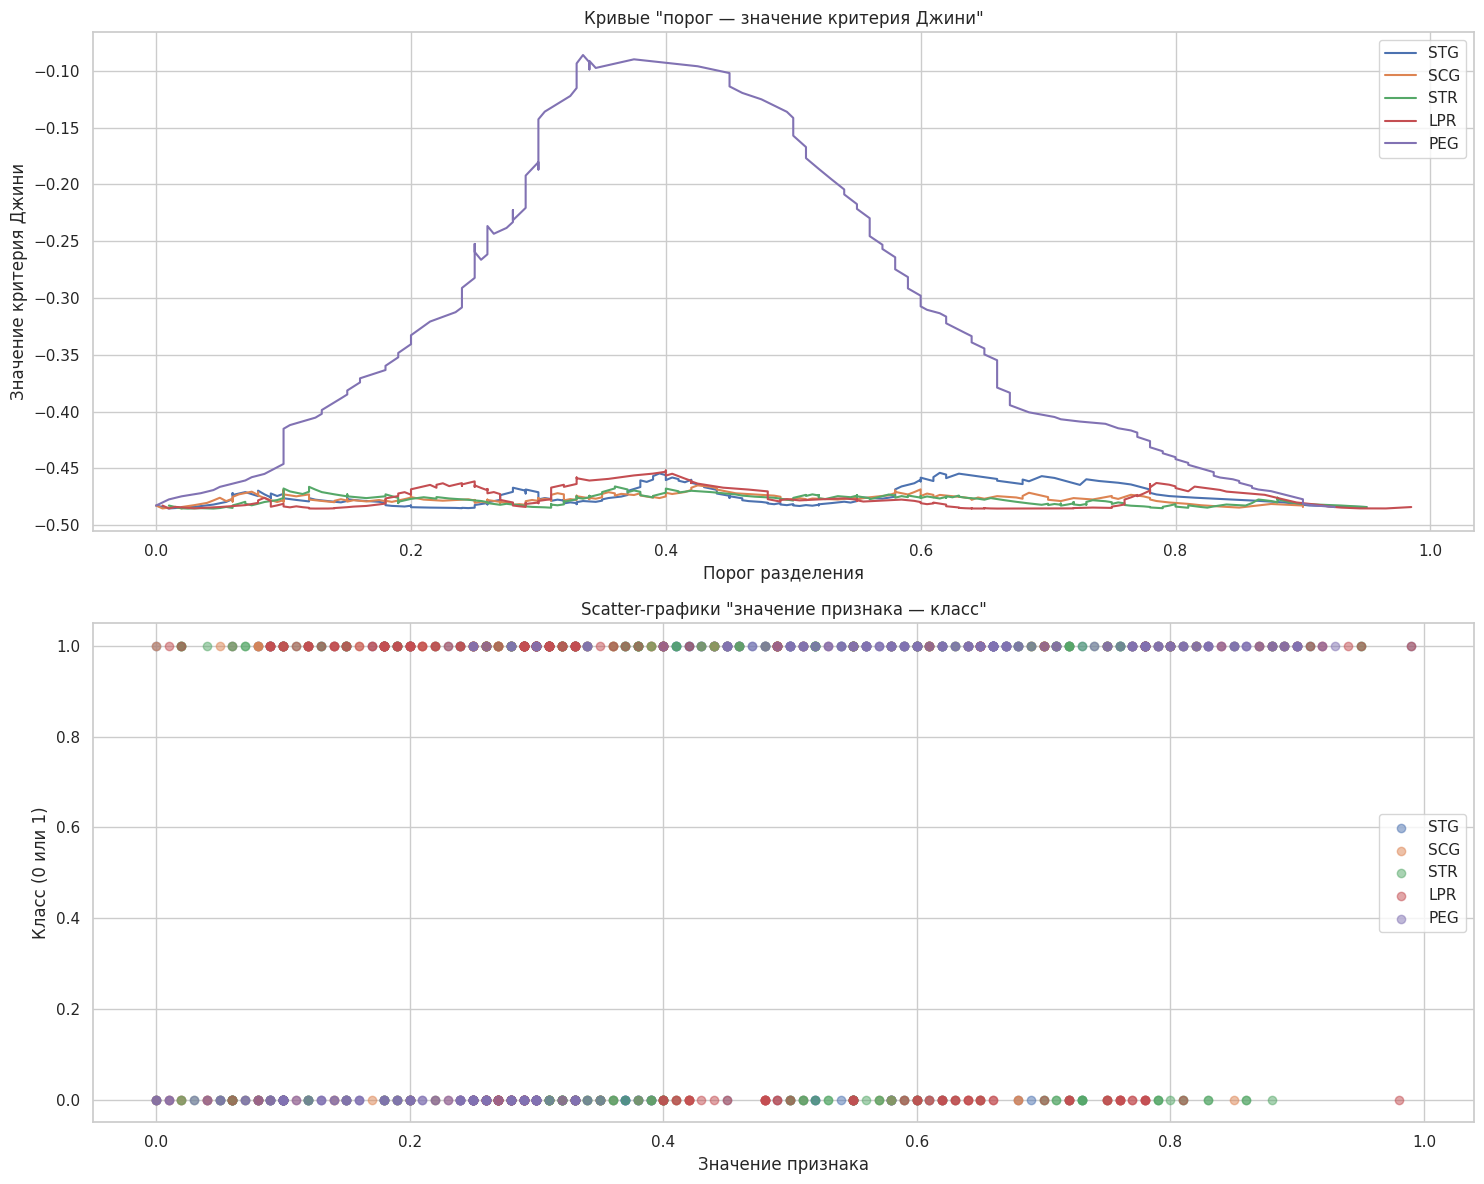

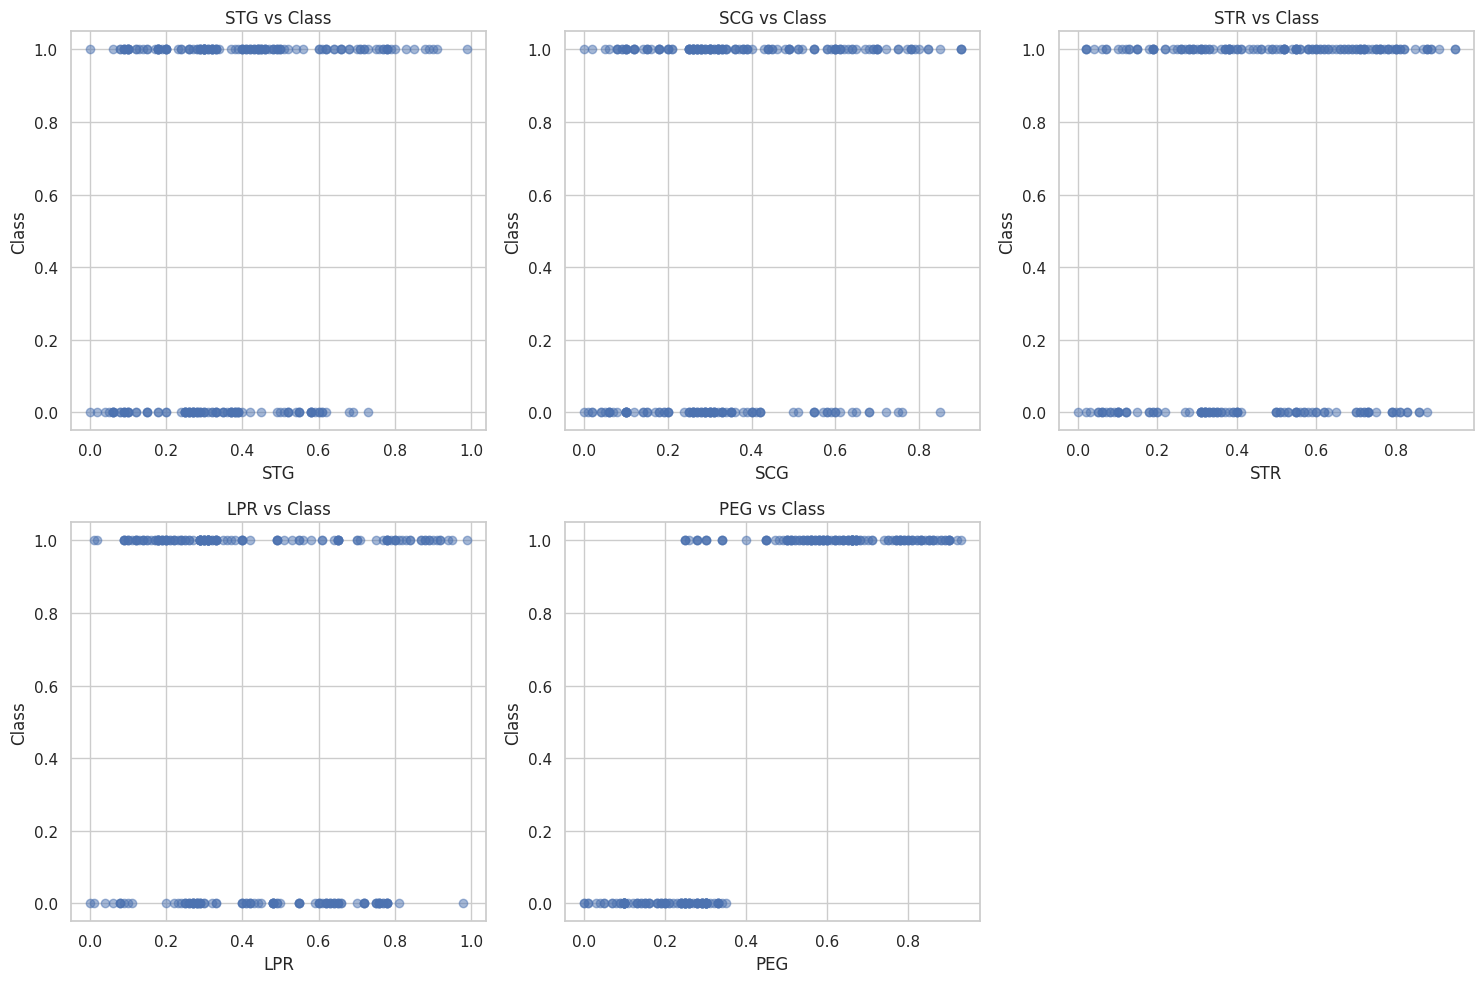

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from hw2code import find_best_split, DecisionTree

df = pd.read_csv('students.csv')
X = df.iloc[:, :5].values
y = df.iloc[:, 5].values
feature_names = df.columns[:5]

plt.figure(figsize=(15, 12))
gs = GridSpec(2, 1, height_ratios=[1, 1])

ax1 = plt.subplot(gs[0])
for i in range(5):
    thresholds, ginis, _, _ = find_best_split(X[:, i], y)
    if len(thresholds) > 0:
        ax1.plot(thresholds, ginis, label=feature_names[i])
ax1.set_title('Кривые "порог — значение критерия Джини"')
ax1.set_xlabel('Порог разделения')
ax1.set_ylabel('Значение критерия Джини')
ax1.legend()
ax1.grid(True)

ax2 = plt.subplot(gs[1])
for i in range(5):
    ax2.scatter(X[:, i], y, alpha=0.5, label=feature_names[i])
ax2.set_title('Scatter-графики "значение признака — класс"')
ax2.set_xlabel('Значение признака')
ax2.set_ylabel('Класс (0 или 1)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.scatter(X[:, i], y, alpha=0.5)
    plt.title(f'{feature_names[i]} vs Class')
    plt.xlabel(feature_names[i])
    plt.ylabel('Class')
    plt.grid(True)
plt.tight_layout()
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Деление следует производить по признаку с максимальным значением критерия Джини, так как хороший признак даст высокий пик, а плохой признак будет иметь низкие значения Джини. Результат согласуется с визуальной оценкой scatter-графиков. Если на scatter-графике точки разных классов визуально разделяются, то кривая Джини для этого признака будет иметь выраженный пик. Если scatter-график показывает хаотичное распределение, то кривая Джини будет почти плоской. Для идеально разделяющих признаков кривая Джини имеет один четкий пик (максимум близок к 0.5) и разделение происходит в узком диапазоне порогов. Деление практически невозможно для почти плочких кривых и если максимальное значение низкое.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [13]:
from sklearn.preprocessing import LabelEncoder

mushrooms = pd.read_csv('agaricus-lepiota.data', header=None)
label_encoder = LabelEncoder()
mushrooms_encoded = mushrooms.apply(label_encoder.fit_transform)
X = mushrooms_encoded.iloc[:, 1:].values
y = mushrooms_encoded.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

feature_types = ['categorical'] * X.shape[1]
clf = DecisionTree(feature_types=feature_types)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

def get_depth(self, node=None):
    if node is None:
        node = self._tree
    if node["type"] == "terminal":
        return 0
    return 1 + max(self.get_depth(node["left_child"]), self.get_depth(node["right_child"]))

DecisionTree.get_depth = get_depth
print(f"Tree depth: {clf.get_depth()}")


Accuracy: 1.0000
Tree depth: 7


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

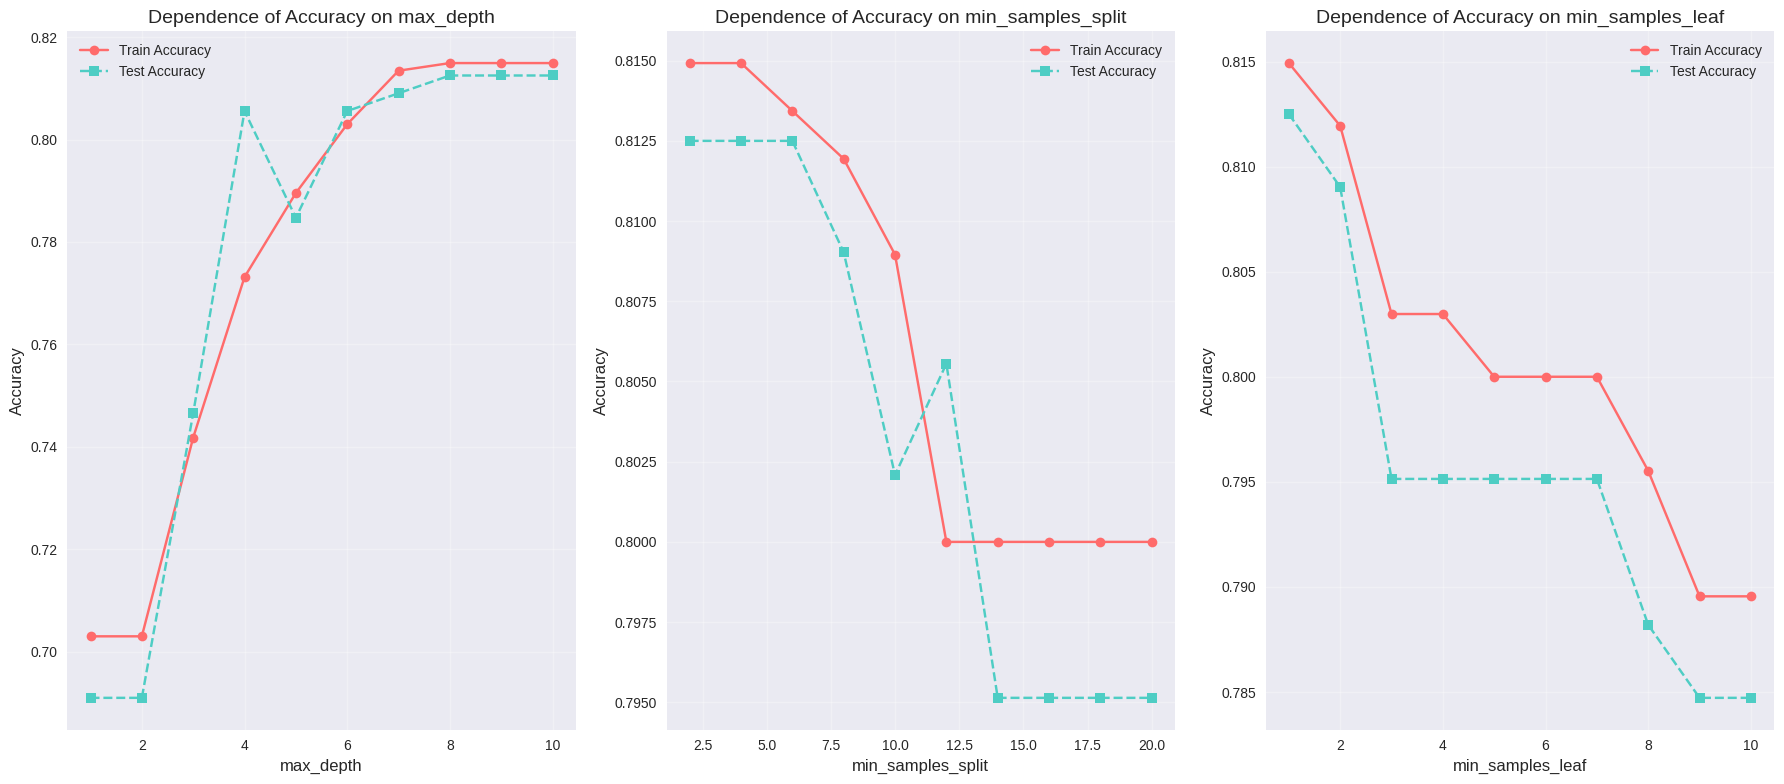

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


tic_tac_toe = pd.read_csv('tic-tac-toe-endgame.csv')
label_encoder = LabelEncoder()
X = tic_tac_toe.iloc[:, :-1].apply(label_encoder.fit_transform).values
y = (tic_tac_toe.iloc[:, -1] == 'positive').astype(int).values
feature_types = ['categorical'] * X.shape[1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

param_ranges = {
    'max_depth': range(1, 11),
    'min_samples_split': range(2, 21, 2),
    'min_samples_leaf': range(1, 11)
}

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(18, 8))
colors = {'train': '#FF6B6B', 'test': '#4ECDC4'}
line_styles = {'train': '-', 'test': '--'}

for i, (param_name, param_values) in enumerate(param_ranges.items(), 1):
    train_accs = []
    test_accs = []

    for param_value in param_values:
        params = {
            'max_depth': 10 if param_name != 'max_depth' else param_value,
            'min_samples_split': 2 if param_name != 'min_samples_split' else param_value,
            'min_samples_leaf': 1 if param_name != 'min_samples_leaf' else param_value
        }

        clf = DecisionTree(feature_types=feature_types, **params)
        clf.fit(X_train, y_train)

        train_acc = accuracy_score(y_train, clf.predict(X_train))
        test_acc = accuracy_score(y_test, clf.predict(X_test))

        train_accs.append(train_acc)
        test_accs.append(test_acc)

    plt.subplot(1, 3, i)
    plt.plot(
        param_values, train_accs,
        marker='o',
        color=colors['train'],
        linestyle=line_styles['train'],
        label='Train Accuracy'
    )
    plt.plot(
        param_values, test_accs,
        marker='s',
        color=colors['test'],
        linestyle=line_styles['test'],
        label='Test Accuracy'
    )

    plt.xlabel(param_name, fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.title(f'Dependence of Accuracy on {param_name}', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.tree import DecisionTreeClassifier

DATA_SOURCES = {
    'mushrooms': ('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', None),
    'tic-tac-toe': ('tic-tac-toe-endgame.csv', None),
    'cars': ('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', None),
    'nursery': ('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data', None)
}

BINARY_MAPPING = {
    'cars': {'unacc': 0, 'acc': 0, 'good': 1, 'vgood': 1},
    'nursery': {'not_recom': 0, 'recommend': 0, 'very_recom': 1, 'priority': 1, 'spec_prior': 1}
}

class DataLoader:
    @staticmethod
    def load_dataset(name):
        url, local_path = DATA_SOURCES[name]
        data = pd.read_csv(local_path if local_path else url, header=None)

        X = data.iloc[:, :-1]
        y = data.iloc[:, -1]

        if name in BINARY_MAPPING:
            y = y.replace(BINARY_MAPPING[name])

        X = X.apply(LabelEncoder().fit_transform)
        y = LabelEncoder().fit_transform(y) if y.dtype == 'object' else y.values

        return X, y

class DecisionTree:
    def __init__(self, feature_types, max_depth=5, min_samples_split=2):
        self.feature_types = feature_types
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        if (depth >= self.max_depth or
            len(y) < self.min_samples_split or
            len(np.unique(y)) == 1):
            return {'value': np.argmax(np.bincount(y))}

        best_feat, best_thresh = self._find_best_split(X, y)
        if best_feat is None:
            return {'value': np.argmax(np.bincount(y))}

        left_mask = X[:, best_feat] <= best_thresh
        right_mask = ~left_mask

        if sum(left_mask) == 0 or sum(right_mask) == 0:
            return {'value': np.argmax(np.bincount(y))}

        left_subtree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        return {
            'feature': best_feat,
            'threshold': best_thresh,
            'left': left_subtree,
            'right': right_subtree
        }

    def _find_best_split(self, X, y):
        best_gini = float('inf')
        best_feat, best_thresh = None, None

        for feat_idx in range(X.shape[1]):
            if self.feature_types[feat_idx] == 'categorical':
                unique_vals = np.unique(X[:, feat_idx])
                for val in unique_vals:
                    mask = X[:, feat_idx] == val
                    gini = self._gini_impurity(y[mask], y[~mask])
                    if gini < best_gini:
                        best_gini = gini
                        best_feat = feat_idx
                        best_thresh = val
            else:
                unique_vals = np.unique(X[:, feat_idx])
                for val in unique_vals:
                    mask = X[:, feat_idx] <= val
                    gini = self._gini_impurity(y[mask], y[~mask])
                    if gini < best_gini:
                        best_gini = gini
                        best_feat = feat_idx
                        best_thresh = val

        return best_feat, best_thresh

    def _gini_impurity(self, left_y, right_y):
        n = len(left_y) + len(right_y)
        p_left = len(left_y) / n
        p_right = len(right_y) / n

        def _gini(y):
            if len(y) == 0:
                return 0
            p = np.bincount(y) / len(y)
            return 1 - np.sum(p**2)

        return p_left * _gini(left_y) + p_right * _gini(right_y)

    def predict(self, X):
        return np.array([self._predict_one(x) for x in X])

    def _predict_one(self, x, node=None):
        if node is None:
            node = self.tree
        if 'value' in node:
            return node['value']
        if x[node['feature']] <= node['threshold']:
            return self._predict_one(x, node['left'])
        else:
            return self._predict_one(x, node['right'])

class CustomDecisionTree:
    def __init__(self, feature_types, max_depth=5, min_samples_split=2):
        self.feature_types = feature_types
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.model = None

    def fit(self, X, y):
        self.model = DecisionTree(
            feature_types=self.feature_types,
            max_depth=self.max_depth,
            min_samples_split=self.min_samples_split
        )
        self.model.fit(
            X.values if isinstance(X, pd.DataFrame) else X,
            y.values if isinstance(y, pd.Series) else y
        )
        return self

    def predict(self, X):
        return self.model.predict(
            X.values if isinstance(X, pd.DataFrame) else X
        )

class TreeWrapperFactory:
    @staticmethod
    def create_wrapper(feature_type, max_depth):
        class Wrapper(BaseEstimator, ClassifierMixin):
            def __init__(self, max_depth=max_depth):
                self.max_depth = max_depth
                self.inner_model = None

            def fit(self, X, y):
                self.inner_model = CustomDecisionTree(
                    feature_types=[feature_type]*X.shape[1],
                    max_depth=self.max_depth
                )
                self.inner_model.fit(X, y)
                return self

            def predict(self, X):
                return self.inner_model.predict(X)

        return Wrapper

class OneHotTreeWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, max_depth=5):
        self.max_depth = max_depth
        self.encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        self.model = None

    def fit(self, X, y):
        X_encoded = self.encoder.fit_transform(X)
        self.model = CustomDecisionTree(
            feature_types=['real']*X_encoded.shape[1],
            max_depth=self.max_depth
        ).fit(X_encoded, y)
        return self

    def predict(self, X):
        X_encoded = self.encoder.transform(X)
        return self.model.predict(X_encoded)

def evaluate_model(estimator, X, y, cv=5):
    try:
        return cross_val_score(
            estimator, X, y, cv=cv,
            scoring=make_scorer(accuracy_score)
        ).mean()
    except Exception as e:
        print(f"Evaluation failed for {estimator.__class__.__name__}: {str(e)}")
        return 0

def run_experiment(datasets, max_depth=5):
    results = []

    for dataset_name in datasets:
        print(f"\nEvaluating {dataset_name}...")
        X, y = DataLoader.load_dataset(dataset_name)

        models = {
            'Real Features': TreeWrapperFactory.create_wrapper('real', max_depth)(),
            'Categorical Features': TreeWrapperFactory.create_wrapper('categorical', max_depth)(),
            'One-Hot Encoding': OneHotTreeWrapper(max_depth=max_depth),
            'Sklearn Tree': DecisionTreeClassifier(max_depth=max_depth)
        }

        dataset_results = {'Dataset': dataset_name}
        for model_name, model in models.items():
            score = evaluate_model(model, X, y)
            dataset_results[model_name] = score
            print(f"{model_name}: {score:.4f}")

        results.append(dataset_results)

    return pd.DataFrame(results).set_index('Dataset')

if __name__ == "__main__":
    experiment_results = run_experiment(
        datasets=['mushrooms', 'tic-tac-toe', 'cars', 'nursery'],
        max_depth=5
    )
    pd.set_option('display.float_format', '{:.4f}'.format)
    print("\nFinal Results:")
    print(experiment_results)



Evaluating mushrooms...
Real Features: 0.6412
Categorical Features: 0.5525
One-Hot Encoding: 0.6133
Sklearn Tree: 0.4783

Evaluating tic-tac-toe...
Real Features: 0.4182
Categorical Features: 0.3531
One-Hot Encoding: 0.4856
Sklearn Tree: 0.6477

Evaluating cars...
Real Features: 0.9148
Categorical Features: 0.9003
One-Hot Encoding: 0.8772
Sklearn Tree: 0.8958

Evaluating nursery...
Real Features: 0.9998
Categorical Features: 0.9998
One-Hot Encoding: 0.9998
Sklearn Tree: 0.9998

Final Results:
             Real Features  Categorical Features  One-Hot Encoding  \
Dataset                                                              
mushrooms           0.6412                0.5525            0.6133   
tic-tac-toe         0.4182                0.3531            0.4856   
cars                0.9148                0.9003            0.8772   
nursery             0.9998                0.9998            0.9998   

             Sklearn Tree  
Dataset                    
mushrooms          0.478

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента.
Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.

Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
Можно ли повлиять на нее и улушить работу алгоритмов?

В разных датасетах алгоритмы ранжируются по-разному.

В таких наборах данных, как mushrooms и nursery, отлично себя показывают категориальные деревья и реализованный в sklearn подход. Причина в том, что в этих датасетах есть информативные категориальные признаки, которые сами по себе хорошо делят объекты на классы без каких-либо преобразований. В таких случаях one-hot encoding может даже навредить из-за роста размерности признакового пространства.

В tic-tac-toe ситуация меняется: здесь выигрыш дает как раз one-hot encoding. Это связано с тем, что признаки работают только в различных сочетаниях, и попытка закодировать их в числовом виде не дает нужной гибкости для разделения классов.

В результатах можно заметить элемент случайности — это связано с тем, как были разбиты данные на обучающую и тестовую выборки. На эту нестабильность можно повлиять: например, увеличить количество фолдов в кросс-валидации (это сгладит разброс оценок), а также использовать стратифицированное разбиение, чтобы сохранять соотношение классов на каждом этапе обучения. Эти меры вместе позволяют получить более надёжную и объективную оценку производительности различных алгоритмов.

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания: